## **K-Nearest Neighbors (KNN) Classification**



1.   Choose a classification dataset and normalize features.
2.   Use KNeighborsClassifier from sklearn.
3.   Experiment with different values of K.
4.   Evaluate model using accuracy, confusion matrix.
5.   Visualize decision boundaries.



Load the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Iris.csv")

In [3]:
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Normalize Features

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

Encode target variable as numeric

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Split the dataset into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.3, random_state=42)
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")

Training data shape: (105, 4), Testing data shape: (45, 4)


Train the KNN classifier with various values of K and evaluate each model.
Evaluate model using accuracy, confusion matrix

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

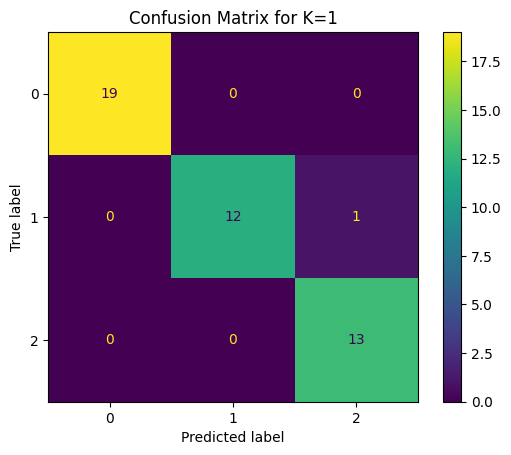

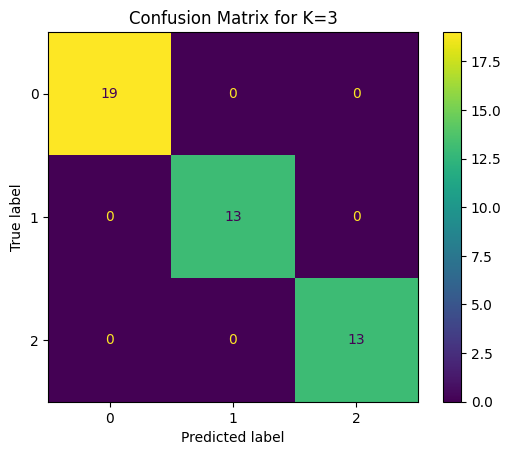

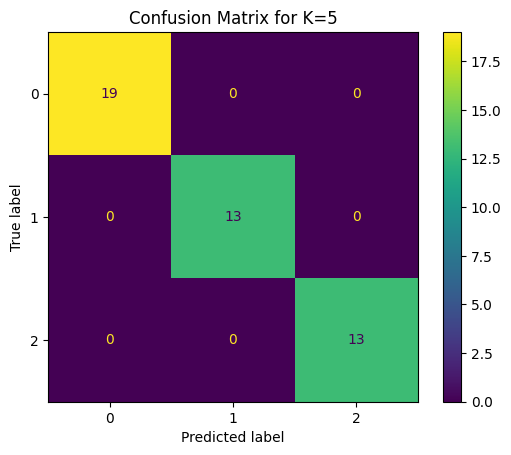

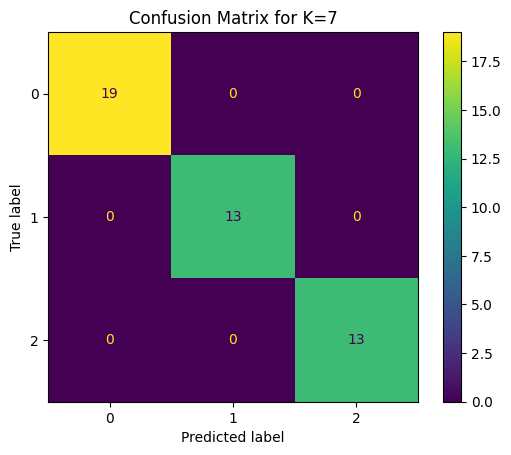

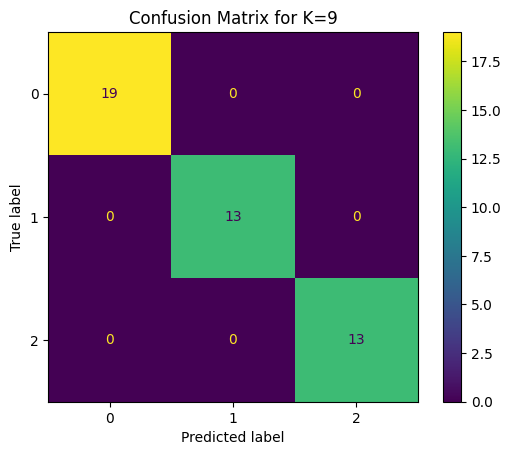

Accuracy for K=1: 0.98
Accuracy for K=3: 1.00
Accuracy for K=5: 1.00
Accuracy for K=7: 1.00
Accuracy for K=9: 1.00


In [22]:
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot()
    plt.title(f'Confusion Matrix for K={k}')
    plt.show()

for k, acc in zip(k_values, accuracies):
    print(f'Accuracy for K={k}: {acc:.2f}')

Visualize the decision boundaries for a chosen value of K

In [23]:
import numpy as np

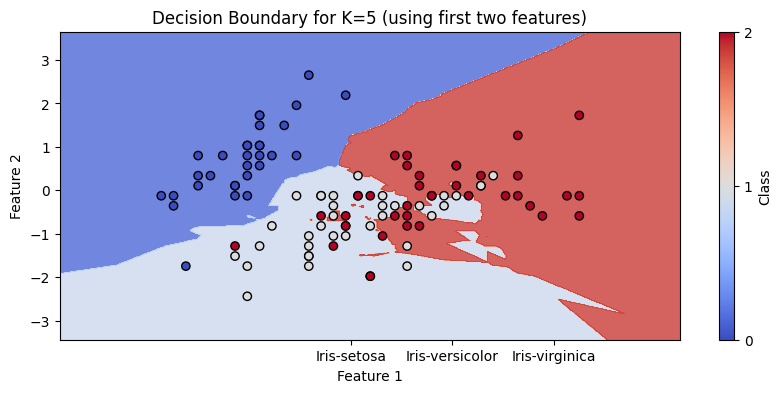

In [29]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train[:, :2], y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z = Z.astype(int)

plt.figure(figsize=(10, 4))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.title(f'Decision Boundary for K={k} (using first two features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(ticks=range(len(label_encoder.classes_)), label='Class')
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.show()